In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt


In [2]:
dataset_dir = 'dataset'

# Image data generator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') 
])

C:\Users\gsuma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


C:\Users\gsuma\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5455 - loss: 1.0751 - val_accuracy: 0.5729 - val_loss: 1.0557
Epoch 2/10
 1/27 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.7812 - loss: 0.5894

c:\Program Files\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7812 - loss: 0.3056 - val_accuracy: 0.6296 - val_loss: 0.6706
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 367ms/step - accuracy: 0.8080 - loss: 0.5082 - val_accuracy: 0.5990 - val_loss: 1.5519
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.2230 - val_accuracy: 0.6296 - val_loss: 0.4447
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - accuracy: 0.9385 - loss: 0.2223 - val_accuracy: 0.4375 - val_loss: 1.6252
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.2124 - val_accuracy: 0.5185 - val_loss: 0.5634
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 362ms/step - accuracy: 0.9764 - loss: 0.1149 - val_accuracy: 0.4583 - val_loss: 2.0820
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0143 - val_accuracy: 0.6296 - val_loss: 0.8028
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 362ms/step - accuracy: 0.9882 - loss: 0.0479 - val_accuracy: 0.6250 - val_los

In [6]:
model.save('lung_cancer_detection_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


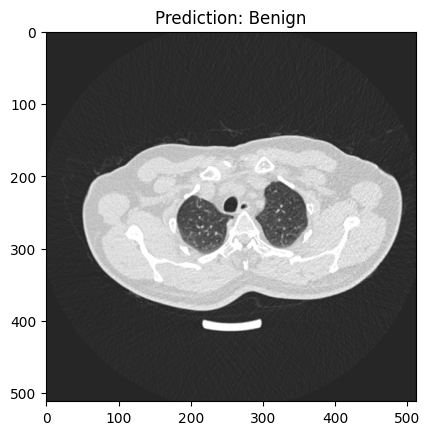

In [7]:
def detect_tumor(image_path, model):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (150, 150))
    img_array = np.expand_dims(img_resized, axis=0) / 255.0
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]
    classes = ['Benign', 'Malignant', 'Normal']
    result = classes[class_idx]
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Prediction: {result}')
    plt.show()

# Example usage
detect_tumor('dataset/Bengin cases/Bengin case (4).jpg', model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


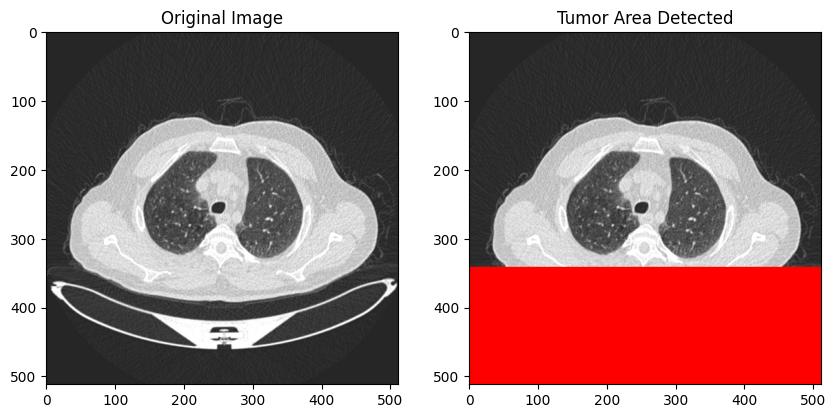

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt


model = load_model('lung_cancer_detection_model.h5')

def preprocess_image(image_path):

    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (150, 150))  # Resize to model input size
    img_array = np.expand_dims(img_resized, axis=0) / 255.0  # Normalize
    return img, img_array

def postprocess_prediction(prediction, original_image):

    prediction_resized = cv2.resize(prediction[0], (original_image.shape[1], original_image.shape[0]))
    mask = (prediction_resized > 0.5).astype(np.uint8)  # Thresholding
    return mask

def detect_tumor_area(image_path, model):

    original_image, preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    mask = postprocess_prediction(prediction, original_image)
    

    overlay = original_image.copy()
    overlay[mask == 1] = [0, 0, 255]  # Red color for the tumor area
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title('Tumor Area Detected')
    plt.show()

detect_tumor_area('dataset/Normal cases/Normal case (1).jpg', model)